# Data Exploration and Cleaning

## Importing libraries

In [ ]:
%pip install pandas numpy matplotlib seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data loading

Setting display options

In [2]:
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

Load and take cursory look at data

In [3]:
df = pd.read_csv("/Users/gregory/Documents/asian-tigers-growth-analysis/fred-downloads/tigers-rawdata.csv")

In [4]:
df.head()

,observation_date,EMPENGARA148NRUG,EMPENGBRA148NRUG,EMPENGHKA148NRUG,EMPENGINA148NRUG,EMPENGJPA148NRUG,EMPENGKRA148NRUG,EMPENGMXA148NRUG,EMPENGMYA148NRUG,EMPENGPHA148NRUG,...,RKNANPINA666NRUG,RKNANPJPA666NRUG,RKNANPKRA666NRUG,RKNANPMXA666NRUG,RKNANPMYA666NRUG,RKNANPPHA666NRUG,RKNANPSGA666NRUG,RKNANPTHA666NRUG,RKNANPTWA666NRUG,RKNANPUSA666NRUG
0,1950-01-01,6.608833,16.988243,NaN,155.781677,39.407654,NaN,7.894486,NaN,6.608846,...,598503.4375,790520.8125,NaN,413534.43750,NaN,73120.882812,NaN,55395.699219,NaN,10563268
1,1951-01-01,6.713252,17.461807,NaN,157.742752,40.384689,NaN,7.985795,NaN,6.797493,...,630228.3750,833484.4375,NaN,441980.68750,NaN,77104.781250,NaN,57122.683594,21416.632812,10898386
2,1952-01-01,6.819321,17.952208,NaN,159.808166,41.342064,NaN,8.078160,NaN,6.991501,...,649041.4375,865191.6875,NaN,473572.87500,NaN,80696.937500,NaN,59035.726562,22141.476562,11258935
3,1953-01-01,6.927065,18.460180,NaN,161.970383,42.261970,6.136804,8.171593,NaN,7.191021,...,675004.1875,893951.9375,160310.25000,503307.46875,NaN,85916.000000,NaN,60994.355469,23250.525391,11667803
4,1954-01-01,7.036511,18.986502,NaN,164.214508,42.801991,6.140400,8.266107,NaN,7.396209,...,718539.1875,929572.2500,158641.65625,537543.75000,NaN,91665.781250,NaN,63111.558594,24417.861328,12058041


## Data Cleaning

Renaming country codes to country names, and making variables readable

In [5]:
df.columns = (df.columns
              .str.replace("EMPENG", "labor")
              .str.replace("LABSHP", "labor_share")
              .str.replace("RGDPNA", "gdp")
              .str.replace("RKNANP", "capital")
              .str.replace("POPTTL", "Population")
              .str.replace("observation_date", "Year")
              .str.replace("ARA", " Argentina")
              .str.replace("BRA", " Brazil")
              .str.replace("HKA", " Hong_Kong")
              .str.replace("INA", " India")
              .str.replace("JPA", " Japan")
              .str.replace("KRA", " Korea")
              .str.replace("MXA", " Mexico")
              .str.replace("MYA", " Malaysia")
              .str.replace("PHA", " Philippines")
              .str.replace("SGA", " Singapore")
              .str.replace("THA", " Thailand")
              .str.replace("TWA", " Taiwan")
              .str.replace("USA", " United_States")
              .str.replace("148NRUG", "")
              .str.replace("666NRUG", "")
              .str.replace("156NRUG", "")
              )

Rearranging rows and columns 

In [6]:
df_clean = df.melt(
    id_vars=['Year'],
    var_name='column_name',
    value_name='value'
)

df_clean['Index'] = df_clean['column_name'].str.rsplit(' ', n=1).str[0]
df_clean['Country'] = df_clean['column_name'].str.rsplit(' ', n=1).str[-1]

df_clean = df_clean.pivot_table(
    index=['Year', 'Country'],
    columns='Index',
    values='value',
    aggfunc='first'
).reset_index()

df_clean['Year'] = pd.to_datetime(df_clean['Year']).dt.year

df_clean = df_clean.sort_values(['Year', 'Country']).reset_index(drop=True)

Checking for missing data

In [7]:
print(df_clean.isnull().sum())

Index
Year           0
Country        0
Population     0
capital        0
gdp            0
labor          0
labor_share    0
dtype: int64


Putting GDP in trillions

In [8]:
df_clean['gdp'] = df_clean['gdp'] / 1000000

Cleaned columns:

In [9]:
df_clean.head (15)

Index,Year,Country,Population,capital,gdp,labor,labor_share
0,1950,Argentina,17.091824,3.090570e+05,0.196688,6.608833,0.441024
1,1950,Brazil,53.124132,4.774726e+05,0.145880,16.988243,0.514606
2,1950,India,370.748836,5.985034e+05,0.308114,155.781677,0.753750
3,1950,Japan,84.274267,7.905208e+05,0.272826,39.407654,0.620528
4,1950,Mexico,27.793445,4.135344e+05,0.149149,7.894486,0.428090
5,1950,Philippines,19.598517,7.312088e+04,0.040754,6.608846,0.437834
6,1950,Thailand,19.930138,5.539570e+04,0.025661,9.319422,0.661368
7,1950,United_States,155.583973,1.056327e+07,2.466595,62.814365,0.628363
8,1951,Argentina,17.457578,3.393378e+05,0.208305,6.713252,0.441024
9,1951,Brazil,54.667327,5.133823e+05,0.153024,17.461807,0.514606


## GDP Analysis

Creating data set with tigers only

In [10]:
tigers = ['Hong_Kong', 'Singapore', 'Korea', 'Taiwan']
tigers_df = df_clean[df_clean['Country'].isin(tigers)].copy()

Plotting GDP over time

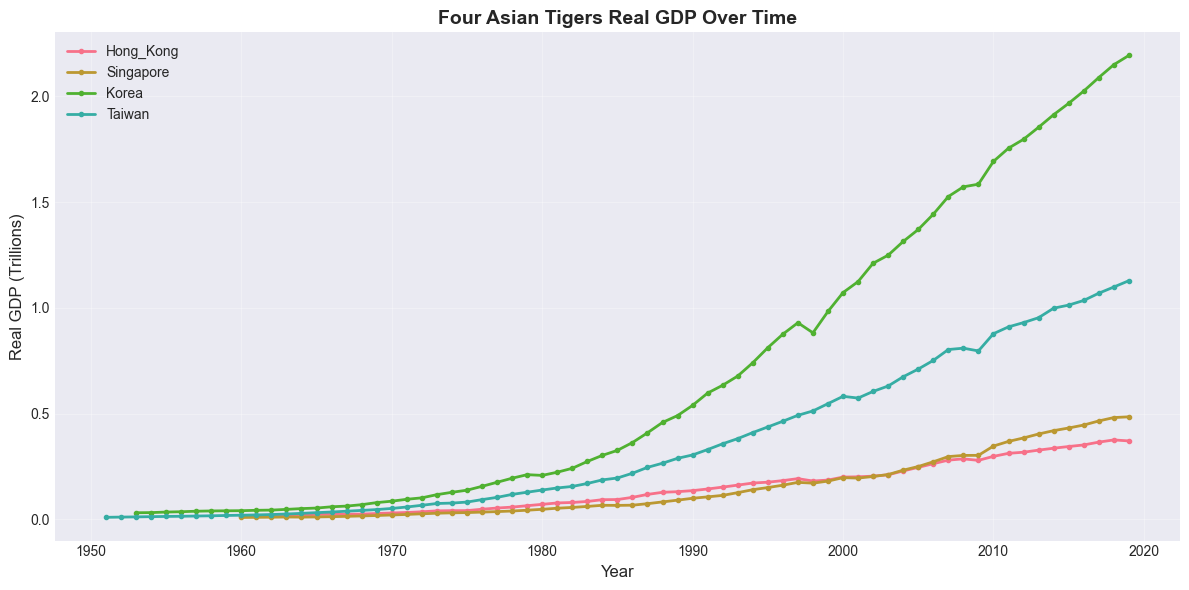

In [11]:
plt.figure(figsize=(12, 6))

for country in tigers:
    country_data = tigers_df[tigers_df['Country'] == country]
    plt.plot(country_data['Year'], country_data['gdp'], 
             marker='o', label=country, linewidth=2, markersize=3)

plt.xlabel('Year', fontsize=12)
plt.ylabel('Real GDP (Trillions)', fontsize=12)
plt.title('Four Asian Tigers Real GDP Over Time', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.ticklabel_format(style='plain', axis='y')
plt.show()

Per Capita Analysis

In [12]:
df_clean['gdp_per_capita'] = df_clean['gdp']/df_clean['Population']
df_clean['gdp_per_capita'] = df_clean['gdp_per_capita'] * 1000
tigers_df = df_clean[df_clean['Country'].isin(tigers)].copy()

Plotting GDP Per Capita over time

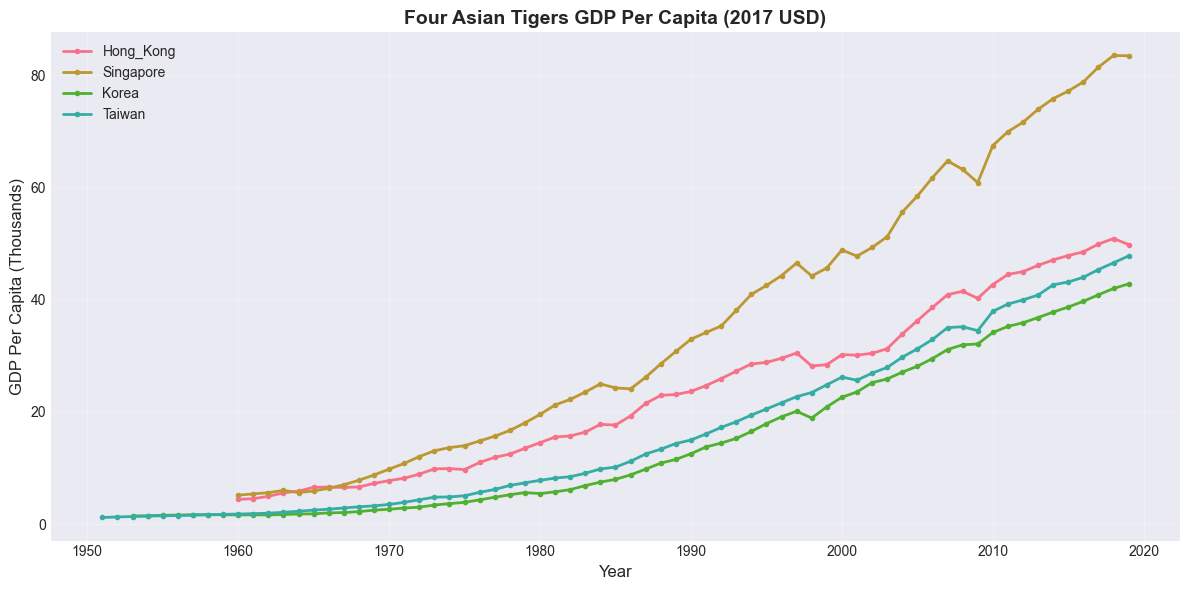

In [13]:
plt.figure(figsize=(12, 6))

for country in tigers:
    country_data = tigers_df[tigers_df['Country'] == country]
    plt.plot(country_data['Year'], country_data['gdp_per_capita'], 
             marker='o', label=country, linewidth=2, markersize=3)

plt.xlabel('Year', fontsize=12)
plt.ylabel('GDP Per Capita (Thousands)', fontsize=12)
plt.title('Four Asian Tigers GDP Per Capita (2017 USD)', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.ticklabel_format(style='plain', axis='y')
plt.show()

Bar chart comparison from 1960 to 2019

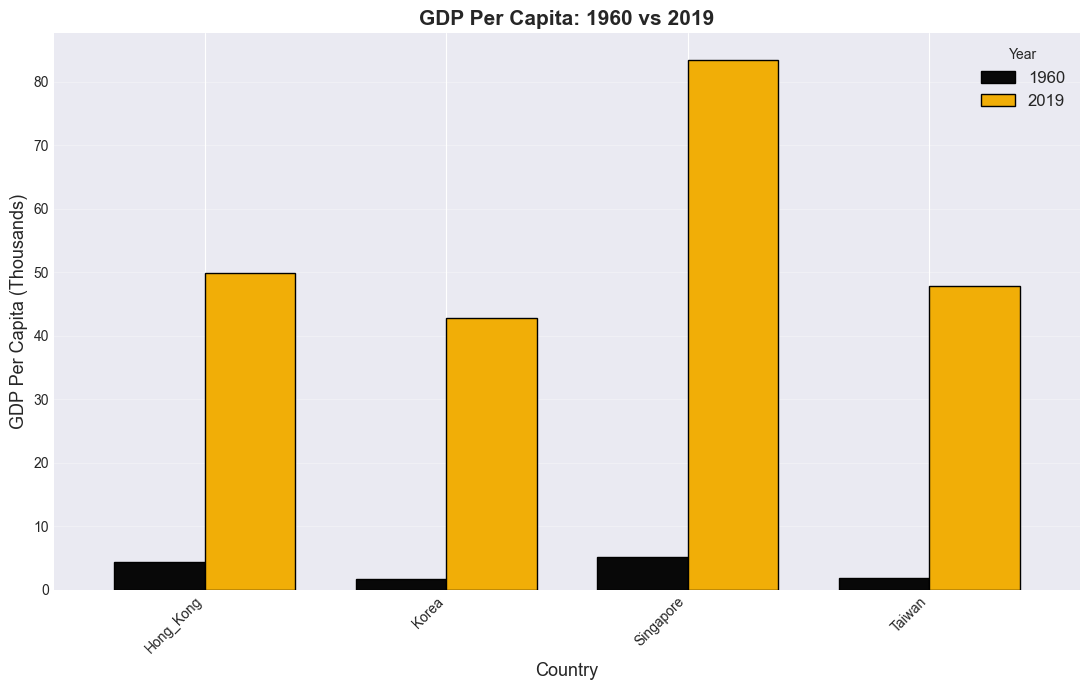

In [14]:
years = [1960,2019]
tigers_df = df_clean[df_clean['Country'].isin(tigers)]

compare = tigers_df[tigers_df['Year'].isin(years)]
pivot = compare.pivot(index='Country',columns='Year',values='gdp_per_capita')

ax = pivot.plot(kind='bar', figsize=(11, 7), width=0.75, 
                      color=["#080808", "#f1ae07"], edgecolor='black')

plt.xlabel('Country', fontsize=13)
plt.ylabel('GDP Per Capita (Thousands)', fontsize=13)
plt.title('GDP Per Capita: 1960 vs 2019', fontsize=15, fontweight='bold')
plt.legend(title='Year', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

## Evidence of Convergence

In [15]:
comparison = ['Hong_Kong', 'Singapore', 'Korea', 'Taiwan', 'United_States']
comp_df = df_clean[df_clean['Country'].isin(comparison)].copy()

Plotting with US GDP per capita

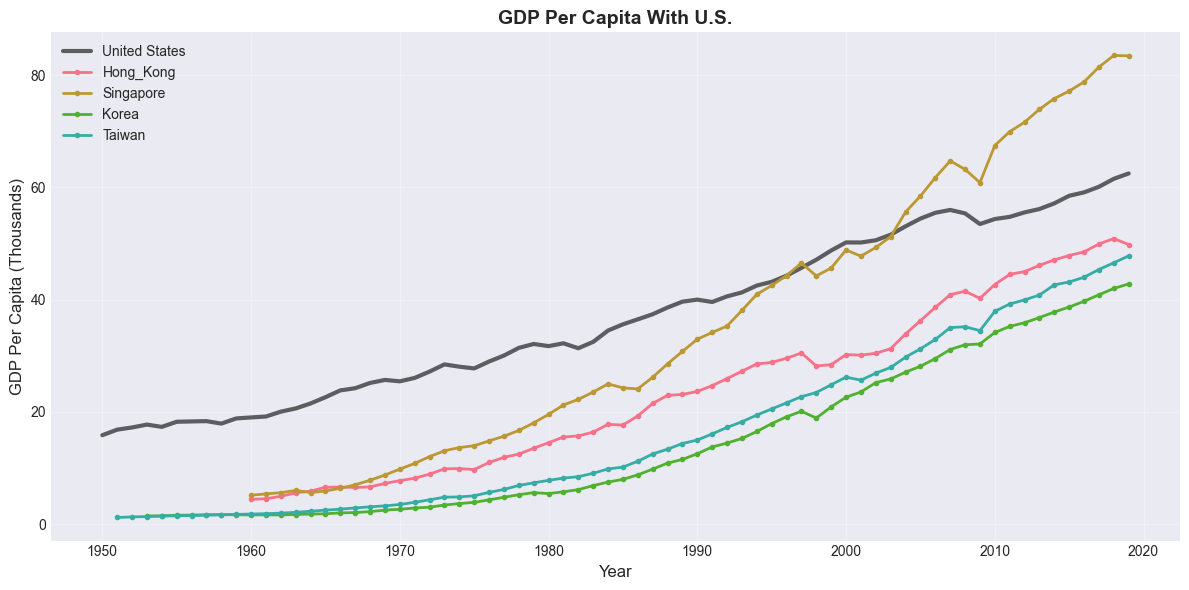

In [16]:
plt.figure(figsize=(12, 6))

usa_data = comp_df[comp_df['Country'] == 'United_States']
plt.plot(usa_data['Year'], usa_data['gdp_per_capita'], 
         label='United States', linewidth=3, color='black', alpha=0.6)

for country in tigers:
    country_data = tigers_df[tigers_df['Country'] == country]
    plt.plot(country_data['Year'], country_data['gdp_per_capita'], 
             marker='o', label=country, linewidth=2, markersize=3)

plt.xlabel('Year', fontsize=12)
plt.ylabel('GDP Per Capita (Thousands)', fontsize=12)
plt.title('GDP Per Capita With U.S.', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.ticklabel_format(style='plain', axis='y')
plt.show()

Calculating convergence ratios

In [17]:
tigers_df = df_clean[df_clean['Country'].isin(tigers)]
us_df = df_clean[df_clean['Country']=='United_States']

merged = tigers_df.merge(
    us_df[['Year','gdp_per_capita']],
    on='Year',
    suffixes=('','_usa')
)

merged['ratio'] = (merged['gdp_per_capita']/merged['gdp_per_capita_usa'])*100

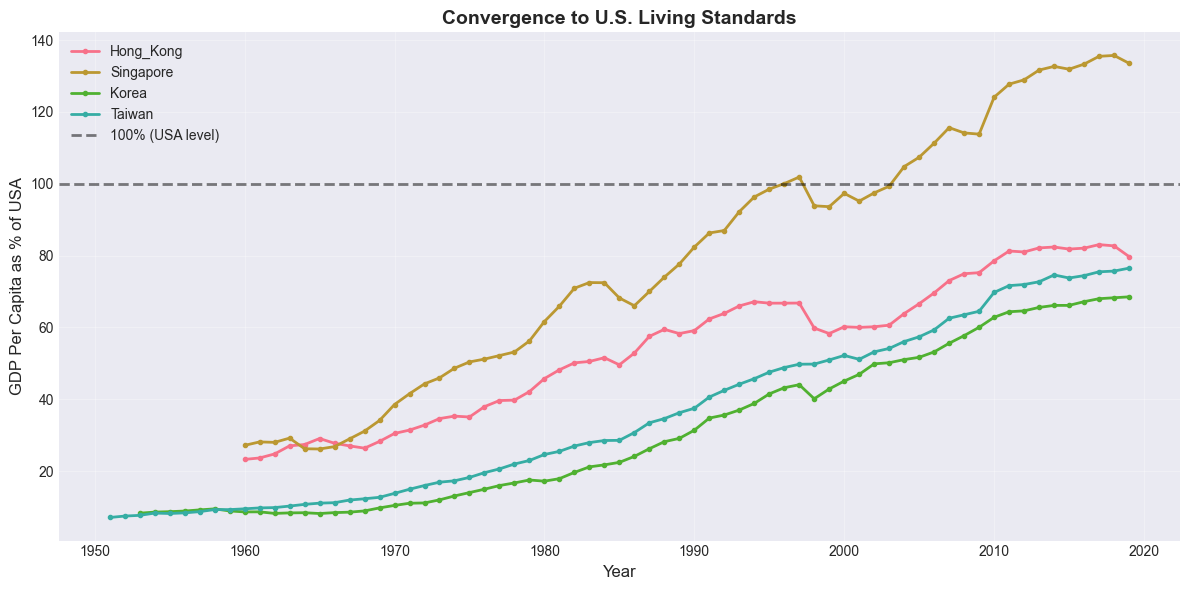

In [18]:
plt.figure(figsize=(12, 6))

for country in tigers:
    country_data = merged[merged['Country']==country]
    plt.plot(country_data['Year'], country_data['ratio'], 
             marker='o', label=country, linewidth=2, markersize=3)

plt.axhline(y=100, color='black', linestyle='--', linewidth=2, alpha=0.5, label='100% (USA level)')
plt.xlabel('Year', fontsize=12)
plt.ylabel('GDP Per Capita as % of USA', fontsize=12)
plt.title('Convergence to U.S. Living Standards', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.ticklabel_format(style='plain', axis='y')
plt.show()

In [19]:
print("\nGDP Per Capita as % of USA:")
final_ratios = merged[merged['Year'] == 2019].groupby('Country')['ratio'].mean()
print(final_ratios.sort_values(ascending=False))


GDP Per Capita as % of USA:
Country
Singapore    133.546969
Hong_Kong     79.726372
Taiwan        76.497719
Korea         68.511401
Name: ratio, dtype: float64


## Per Capita Growth Rates

Calculating GDP per capita growth rates across different time periods

In [20]:
df_clean = df_clean.sort_values(['Country','Year'])
df_clean['gdp_per_capita_growth'] = df_clean.groupby('Country')['gdp_per_capita'].pct_change()*100

tigers_df = df_clean[df_clean['Country'].isin(tigers)]

print('Average GDP Per Capita Growth Rates (%)')
avg_growth = tigers_df.groupby('Country')['gdp_per_capita_growth'].mean()
print(avg_growth.sort_values(ascending=False))

pre90 = tigers_df[(tigers_df['Year'] >= 1960) & (tigers_df['Year'] <= 1990)]
post00 = tigers_df[(tigers_df['Year'] >= 2000) & (tigers_df['Year'] <= 2019)]

print("\n1960-1990 \"Miracle\" Period Per Capita Growth Rates")
print(pre90.groupby('Country')['gdp_per_capita_growth'].mean().sort_values(ascending=False))

print("\nPost-2000 Per Capita Growth Rates")
print(post00.groupby('Country')['gdp_per_capita_growth'].mean().sort_values(ascending=False))

Average GDP Per Capita Growth Rates (%)
Country
Taiwan       5.622614
Korea        5.314918
Singapore    4.911196
Hong_Kong    4.272725
Name: gdp_per_capita_growth, dtype: float64

1960-1990 "Miracle" Period Per Capita Growth Rates
Country
Taiwan       7.222796
Korea        6.789151
Singapore    6.454285
Hong_Kong    5.835817
Name: gdp_per_capita_growth, dtype: float64

Post-2000 Per Capita Growth Rates
Country
Korea        3.667285
Taiwan       3.365060
Singapore    3.120713
Hong_Kong    2.889264
Name: gdp_per_capita_growth, dtype: float64


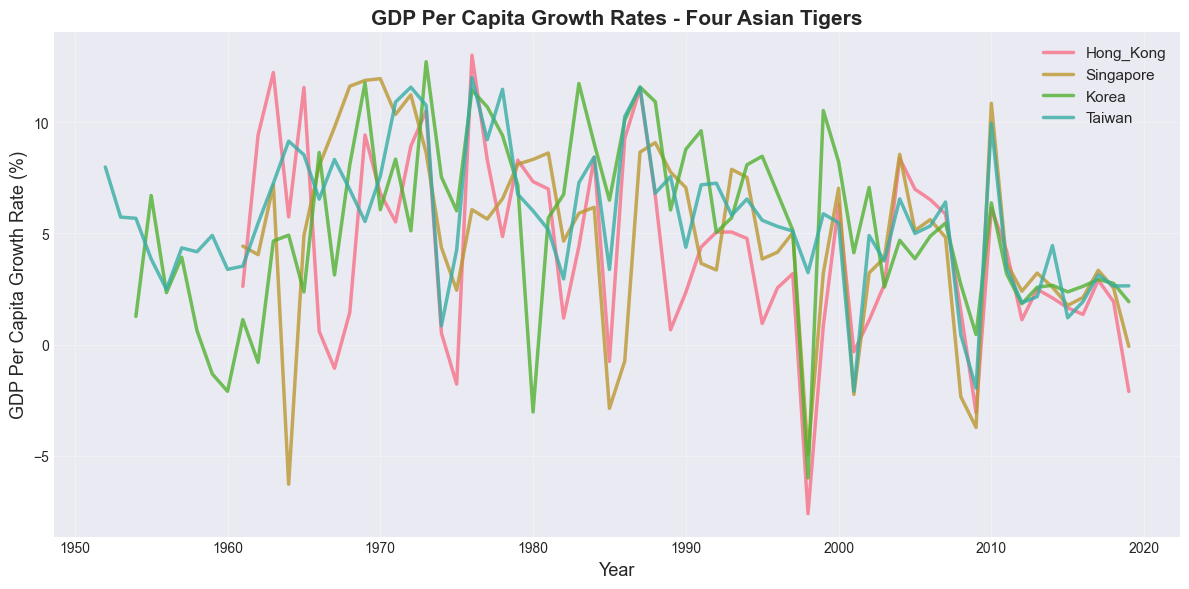

In [21]:
tigers_df = df_clean[df_clean['Country'].isin(tigers)]

plt.figure(figsize=(12, 6))

for country in tigers:
    country_data = tigers_df[tigers_df['Country'] == country]
    plt.plot(country_data['Year'], country_data['gdp_per_capita_growth'], 
             label=country, linewidth=2.5, alpha=0.8)

plt.xlabel('Year', fontsize=13)
plt.ylabel('GDP Per Capita Growth Rate (%)', fontsize=13)
plt.title('GDP Per Capita Growth Rates - Four Asian Tigers', fontsize=15, fontweight='bold')
plt.legend(fontsize=11, loc='upper right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Latin America Comparison

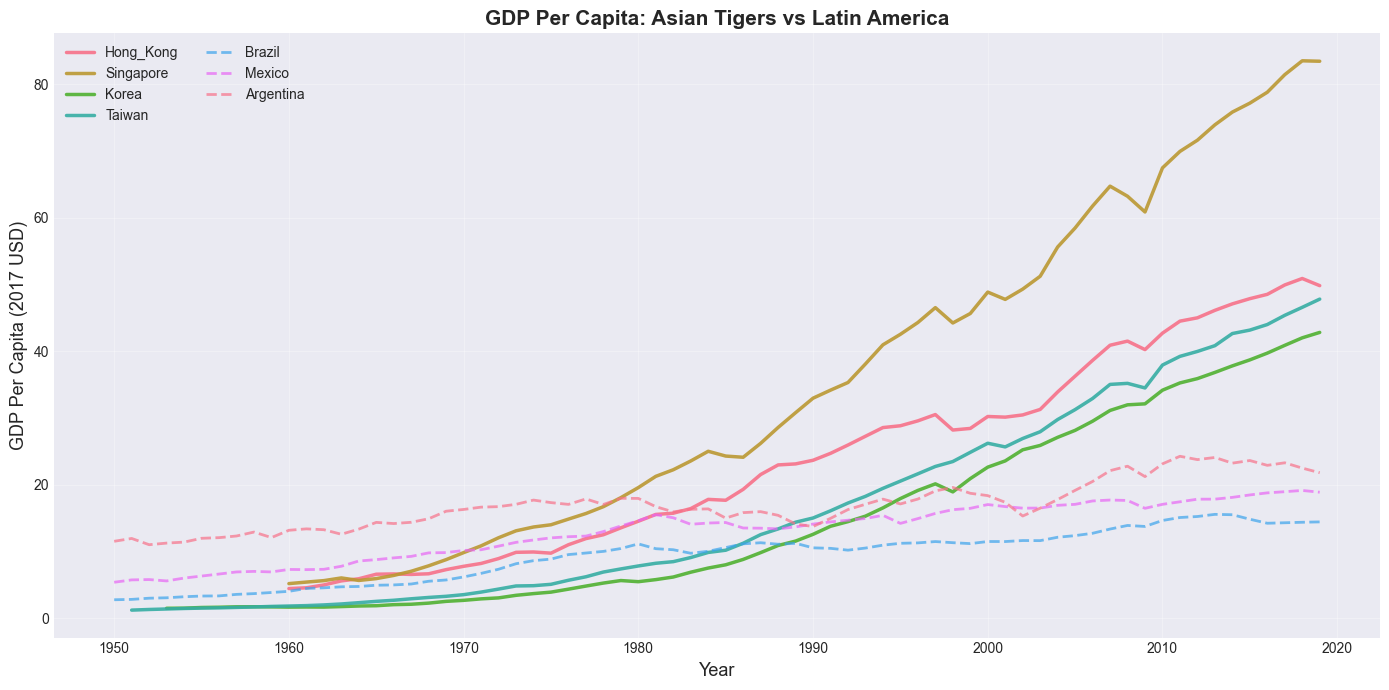

In [22]:
latam = ['Brazil','Mexico','Argentina']
latam_comparison = tigers + latam

comp_df = df_clean[df_clean['Country'].isin(latam_comparison)]

plt.figure(figsize=(14, 7))

for country in tigers:
    country_data = comp_df[comp_df['Country'] == country]
    plt.plot(country_data['Year'], country_data['gdp_per_capita'], 
             label=country, linewidth=2.5, alpha=0.9)

for country in latam:
    country_data = comp_df[comp_df['Country'] == country]
    plt.plot(country_data['Year'], country_data['gdp_per_capita'], 
             label=country, linewidth=2, linestyle='--', alpha=0.7)

plt.xlabel('Year', fontsize=13)
plt.ylabel('GDP Per Capita (2017 USD)', fontsize=13)
plt.title('GDP Per Capita: Asian Tigers vs Latin America', fontsize=15, fontweight='bold')
plt.legend(fontsize=10, ncol=2)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()